# Gerekli kütüphanelerin import edilmesi

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv("titanic.csv", sep = ",")
test_df = pd.read_csv("test.csv", sep = ",")

full_df = pd.concat([train_df, test_df])

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Veri Setine Genel Bir Bakış

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
full_df.shape

(1309, 12)

In [6]:
train_df.size

10692

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1, 'Missing values heatmap')

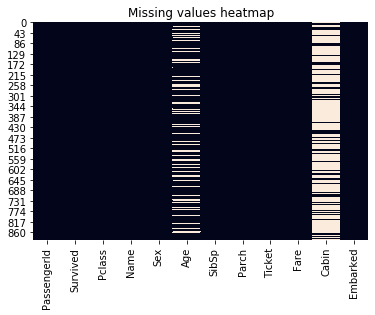

In [12]:
sns.heatmap(train_df.isnull(), cbar = False).set_title("Missing values heatmap")

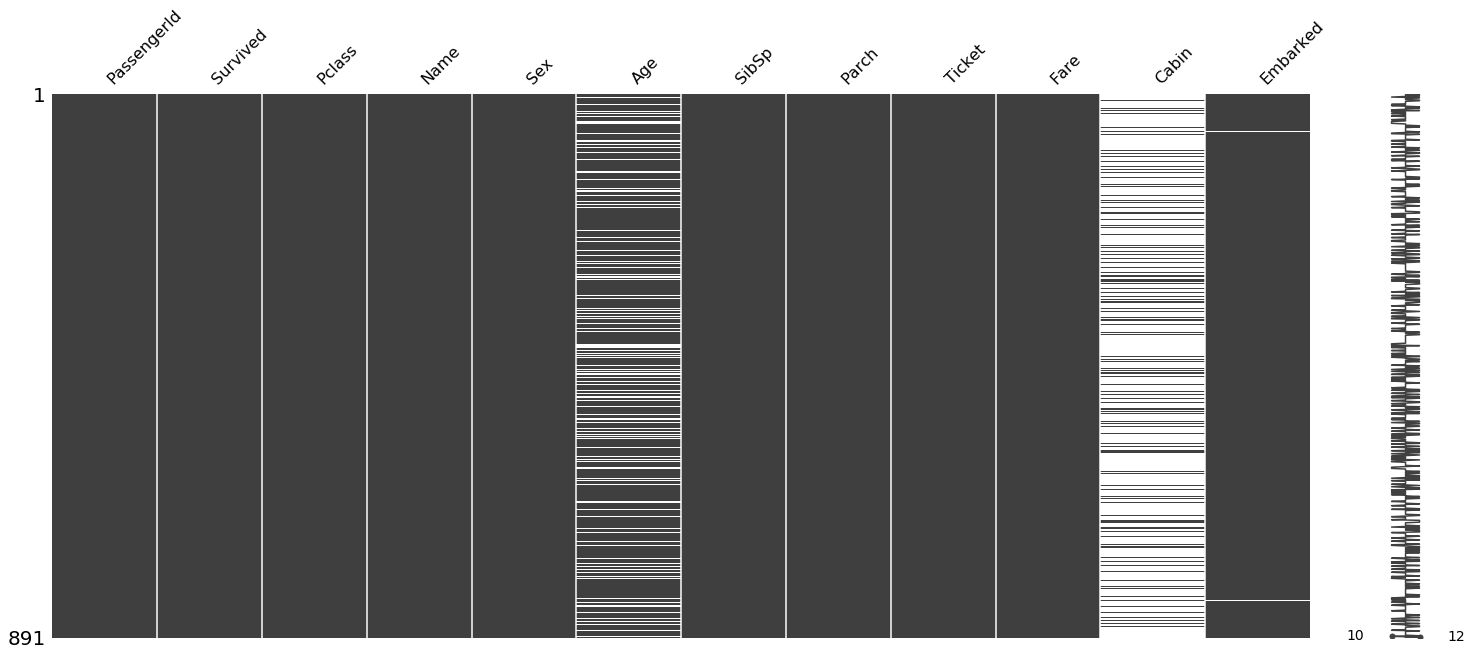

In [13]:
# !pip install missingno
import missingno as msno
msno.matrix(train_df)

In [14]:
train_df[["Age","Embarked","Cabin"]].iloc[0:10]


,Age,Embarked,Cabin
0,22.0,S,NaN
1,38.0,C,C85
2,26.0,S,NaN
3,35.0,S,C123
4,35.0,S,NaN
5,NaN,Q,NaN
6,54.0,S,E46
7,2.0,S,NaN
8,27.0,S,NaN
9,14.0,C,NaN


# VERİ SETİNİN GÖRSELLEŞTİRİLMESİ

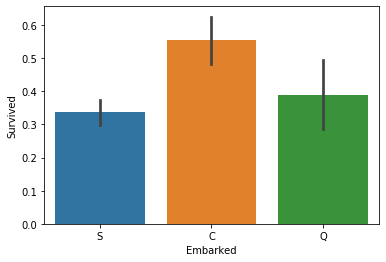

In [15]:
sns.barplot(train_df['Embarked'], train_df['Survived']);

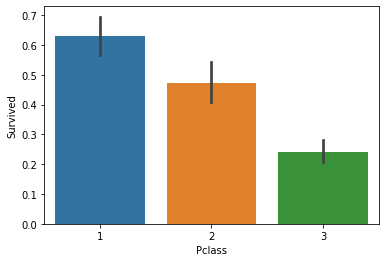

In [16]:
sns.barplot(train_df['Pclass'], train_df['Survived']);

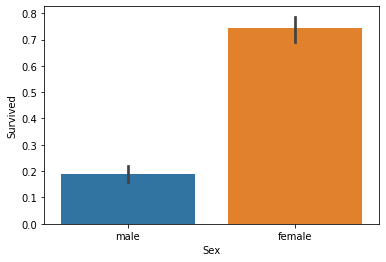

In [17]:
sns.barplot(train_df['Sex'], train_df['Survived']);

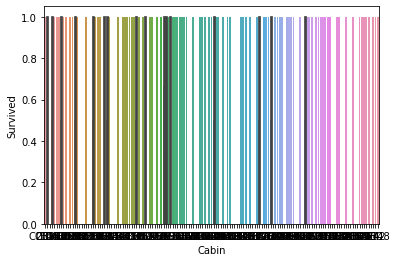

In [18]:
sns.barplot(train_df['Cabin'], train_df['Survived'])

Text(0, 0.5, 'Count')

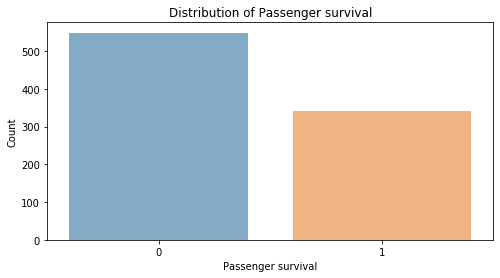

In [19]:
plt.figure(figsize=(8,4))
Survived = train_df["Survived"].value_counts()
sns.barplot(y=Survived.values, x=Survived.index, alpha=0.6)
plt.title('Distribution of Passenger survival')
plt.xlabel('Passenger survival', fontsize=10)
plt.ylabel('Count', fontsize=10)

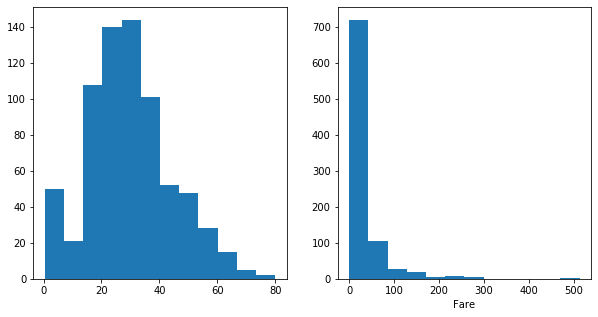

In [20]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(train_df["Age"].dropna(),bins = 12)
ax1.set_xlabel = ("Age")

ax2.hist(train_df["Fare"], bins = 12)
ax2.set_xlabel("Fare")
plt.show()
plt.close()

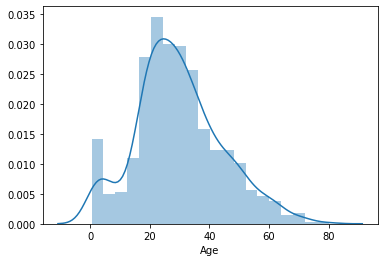

In [21]:
#titanic_dataset.dropna(inplace = True)
sns.distplot(train_df["Age"])

# Feature Engineering 

### Kategorik değişkeni sayısal değerlere dönüştürme

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## 1.CİNSİYET DEĞİŞKENİ İÇİN  ANALİZ

In [24]:
# Binary encoding

train_df["Sex"] = train_df["Sex"].map({"male":0, "female":1})


In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## 2. Cabin Değişkeni İçin Analiz 

In [26]:
# Cabin değişkeninin çok büyük oranda eksik değer içermesinden dolayı veri setinden silindi.

train_df.drop("Cabin", axis = 1, inplace = True)

## 3.EMBARKED Değişkeni İçin Analiz

In [27]:
southampton = train_df[train_df["Embarked"] == "S"].shape[0]
print("Southampton(S)'dan binen yolcu sayısı:",southampton)

cherbourg = train_df[train_df["Embarked"] == "C"].shape[0]
print("Cherbourg (C)'dan binen yolcu sayısı:",cherbourg)

queenstown = train_df[train_df["Embarked"] == "Q"].shape[0]
print("Queenstown(Q)'dan binen yolcu sayısı:",queenstown )

Southampton(S)'dan binen yolcu sayısı: 644
Cherbourg (C)'dan binen yolcu sayısı: 168
Queenstown(Q)'dan binen yolcu sayısı: 77


In [28]:
# her farklı kategorideki embark için değer atama (MAPPING)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1.0


## Ticket Değişkeni İçin Analiz



In [30]:
# Bilet değişkeni doğrudan target değerine etki etmeyeceği için silebiliriz.

In [31]:
train_df = train_df.drop(["Ticket"], axis= 1)

In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1.0


## Pclass Değişkeni İçin Analiz

In [33]:
print(train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


## Name Değişkeni İçin Analiz

In [34]:
import re as re  # for regular expression

In [35]:
for dataset in [train_df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [36]:
# Veri setinde yer alan name değişkeninde bulanan unvanları daha genel kullanımına 
# göre replace metoduyla değiştirelim ve hayatta kalma durumuna göre gruplayalım

for dataset in [train_df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


#### EMBARKED DEĞİŞKENİ İÇİN EKSİK VERİYİ MOD İLE DOLDURMA

In [37]:
train_df_categ = train_df[["PassengerId","Name","Embarked","Pclass","Sex","Title"]]

In [38]:
# Embarked değişkeninde yer alan kayıp değerleri mod ile dolduruyoruz.

embarked = train_df_categ["Embarked"].mode()[0]
print(embarked) # mod değeri

1.0


In [39]:
train_df_categ["Embarked"] = train_df_categ["Embarked"].fillna(embarked)


C:\Users\ysdmn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
train_df_categ.isnull().sum()

PassengerId    0
Name           0
Embarked       0
Pclass         0
Sex            0
Title          0
dtype: int64

In [41]:
target = train_df["Survived"]   # hedef değişken belirlendi


In [42]:
train_df.drop(["Survived","PassengerId","Name","Embarked","Sex","Pclass","Title"], axis = 1, inplace = True)

In [43]:
train_df_num = train_df
train_df_num.isnull().sum()   

Age      177
SibSp      0
Parch      0
Fare       0
dtype: int64

# Eksik Veri Doldurma Yöntemleri 

#### 1. ORTALAMA (MEAN) İLE DOLDURMA

In [44]:
# Age değişkeni için çeşitli veri doldurma yöntemlerini uygulayalım.

In [45]:
train_df_mean = train_df_num.copy() 

In [46]:
mean_age = train_df_num["Age"].mean() # ortalama yaş değeri
print(round(mean_age,1))

29.7


In [47]:
train_df_mean.tail()  # mean ile doldurulmadan önce

,Age,SibSp,Parch,Fare
886,27.0,0,0,13.00
887,19.0,0,0,30.00
888,NaN,1,2,23.45
889,26.0,0,0,30.00
890,32.0,0,0,7.75


In [48]:
train_df_mean['Age'] = train_df_mean["Age"].fillna(np.round(mean_age,1))

In [49]:
train_df_mean.tail()  # mean ile doldurulduktan sonra

,Age,SibSp,Parch,Fare
886,27.0,0,0,13.00
887,19.0,0,0,30.00
888,29.7,1,2,23.45
889,26.0,0,0,30.00
890,32.0,0,0,7.75


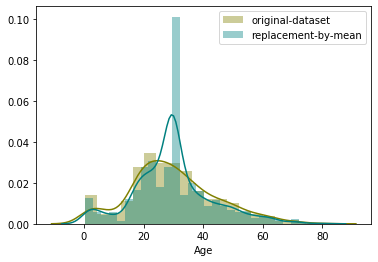

In [50]:
sns.distplot(train_df_num["Age"] , color="olive", label="original-dataset")
sns.distplot( train_df_mean["Age"] , color="teal", label="replacement-by-mean")
plt.legend()
plt.show()

#### 2. MEDYAN (ORTANCA) İLE DOLDURMA

In [51]:
train_df_median = train_df_num.copy()

In [52]:
median_age = train_df_num["Age"].median()
print("median age:",median_age)

median age: 28.0


In [53]:
train_df_median.tail() # medyan ile doldurulmadan önce

,Age,SibSp,Parch,Fare
886,27.0,0,0,13.00
887,19.0,0,0,30.00
888,NaN,1,2,23.45
889,26.0,0,0,30.00
890,32.0,0,0,7.75


In [54]:
train_df_median["Age"] = train_df_median["Age"].fillna(median_age)

In [55]:
train_df_median.tail() # medyan ile doldurulduktan sonra

,Age,SibSp,Parch,Fare
886,27.0,0,0,13.00
887,19.0,0,0,30.00
888,28.0,1,2,23.45
889,26.0,0,0,30.00
890,32.0,0,0,7.75


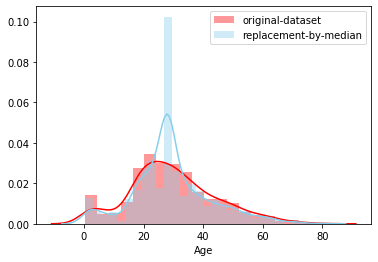

In [56]:
sns.distplot(train_df_num["Age"] , color="red", label="original-dataset")
sns.distplot( train_df_median["Age"] , color="skyblue", label="replacement-by-median")
plt.legend()
plt.show()

#### 3. Mod ile Doldurma

In [57]:
train_df_mode = train_df_num.copy()

In [58]:
age_mode = train_df_mode["Age"].mode()[0] # modunu bulma
age_mode

24.0

In [59]:
train_df_mode["Age"] = train_df_mode["Age"].fillna(age_mode)

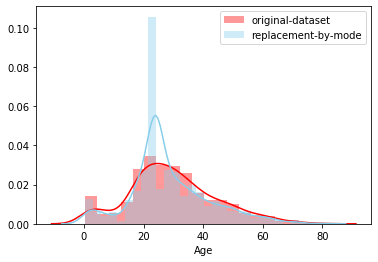

In [60]:
sns.distplot(train_df_num["Age"] , color="red", label="original-dataset")
sns.distplot(train_df_mode["Age"] , color="skyblue", label="replacement-by-mode")
plt.legend()
plt.show()

#### 4. KNN-Imputer Metodu

In [61]:
from sklearn.impute import KNNImputer

In [62]:
train_df_knn = train_df_num.copy()
train_df_knn

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


In [63]:
np_df_knn = np.array(train_df_knn)
np_df_knn

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [    nan,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [64]:
imputer = KNNImputer(n_neighbors= 4) # komşu sayısı belirtildi

In [65]:
np_df_knn = imputer.fit_transform(train_df_knn)

In [66]:
var_names = ["Age","SibSp","Parch","Fare"]
train_df_knn = pd.DataFrame(np_df_knn, columns = var_names)


In [67]:
train_df_knn.isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64

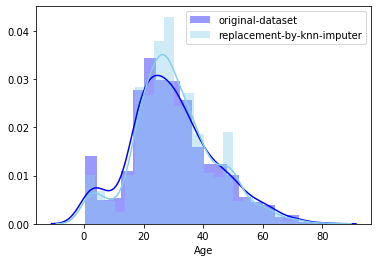

In [68]:
sns.distplot(train_df_num["Age"] , color="blue", label="original-dataset")
sns.distplot(train_df_knn["Age"] , color="skyblue", label="replacement-by-knn-imputer")
plt.legend()
plt.show()

# EKSİK VERİ DOLDURMA YÖNTEMLERİNİN GRAFİKLE GENEL GÖSTERİMİ

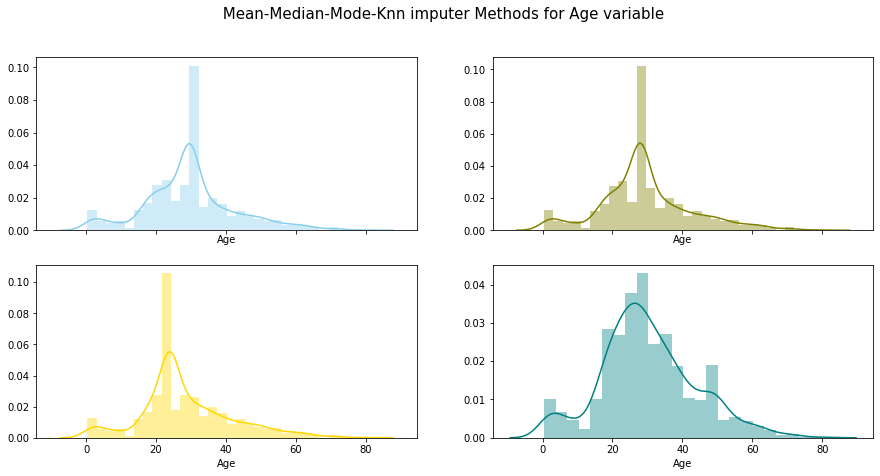

In [69]:
# plots

f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)

sns.distplot( train_df_mean["Age"] , color="skyblue", ax=axes[0, 0])  # yaş değişkeninin ortalama ile doldurulması

sns.distplot( train_df_median["Age"] , color="olive", ax=axes[0, 1]) # yaş değişkeninin medyan ile doldurulması

sns.distplot( train_df_mode["Age"] , color="gold", ax=axes[1, 0]) # yaş değişkeninin mod ile doldurulması

sns.distplot( train_df_knn["Age"] , color="teal", ax=axes[1, 1]) # yaş değişkeninin knn-imputer ile doldurulması

f.suptitle(" Mean-Median-Mode-Knn imputer Methods for Age variable", fontsize=15)

plt.show()

# AYKIRI GÖZLEM ANALİZİ YÖNTEMLERİ

### YÖNTEM 1 : KUTU GRAFİĞİ KULLANMA

Age değişkeni için aykırı değer var mı ? Bu sorunun cevabı için box plot ile görselleştirme yapalım.

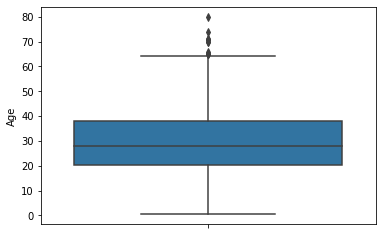

In [70]:
sns.boxplot(y = train_df_num["Age"])

In [71]:
train_df_show = train_df_num.copy()

In [72]:
train_df_show.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500



## Nümerik Verilerde Aykırı Değer olup Olmadığını Görselleştirme

In [73]:
train_df_show.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


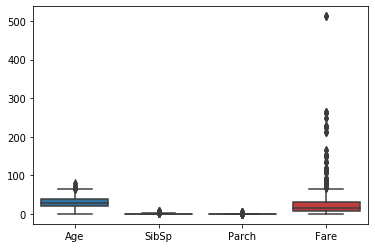

In [74]:
Fare = [train_df_num.Fare]
Age = [train_df_num.Age]
SibSp = [train_df_num.SibSp]
Parch = [train_df_num.Parch]

df = pd.DataFrame(data = np.random.random(size=(10,4)), columns = ["Age","Fare","SibSp","Parch"])

sns.boxplot(data=train_df_show, width = 0.8)

plt.show()


Box plot grafiğinde kolaylıkla görüldüğü gibi özellikle Age ve Fare değişkenlerinde aykırı değerler mevcuttur.
Bu değerleri çeşitli aykırı değer analiz yöntemlerini kullanarak değerlendirelim:

### İlk Olarak Age Değişkeni Üzerinde Aykırı Değerleri Kaldıralım 

In [75]:
train_df_Age = pd.DataFrame(train_df["Age"])
train_df_Fare = pd.DataFrame(train_df["Fare"])

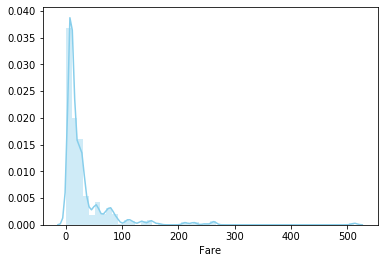

In [76]:
sns.distplot( train_df_num["Fare"] , color="skyblue")

In [77]:
# Age için birinci ve üçüncü kartil değeerlerini hesaplayalım:

AgeQ1 = train_df["Age"] .quantile(0.25)
AgeQ3 = train_df["Age"].quantile(0.75)
AgeIQR = AgeQ3 - AgeQ1


In [78]:
print("AgeQ1:", AgeQ1,"\t","AgeQ3:", AgeQ3, "\t","AgeIQR:", AgeIQR) # yaşın Q1, Q3 ve interquantile range değerleri

AgeQ1: 20.125 	 AgeQ3: 38.0 	 AgeIQR: 17.875


In [79]:

lower_bound_age = AgeQ1 - 1.5 * AgeIQR #  yaş değişkenine ait üst sınır
upper_bound_age = AgeQ3 + 1.5 * AgeIQR # yaş değişkenine ait alt sınır

print("lower_bound_age: ", lower_bound_age, "\t", "upper_bound_age: ", upper_bound_age)

lower_bound_age:  -6.6875 	 upper_bound_age:  64.8125


In [80]:
without_outlier_df_age = train_df_Age[~ ((train_df_Age< (lower_bound_age)) | (train_df_Age> (upper_bound_age))).any(axis = 1)]

In [81]:
print(train_df_num["Age"].shape)      #  yaş değişkeninde aykırı değerler atılmadan önce
print(without_outlier_df_age.shape)  #  yaş değişkeninde aykırı değerler atıldığında 

(891,)
(880, 1)


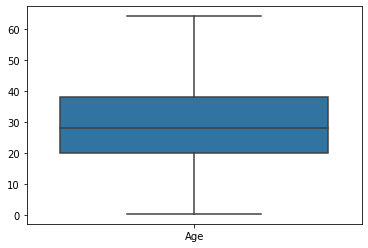

In [82]:
# aykırı değerlerin atılarak Age değişkeninin görselleştirilmesi
sns.boxplot(data = without_outlier_df_age ) 

### Aynı Yöntemi Kullanarak Fare Değişkeni Üzerinde Aykırı Değerleri Kaldıralım

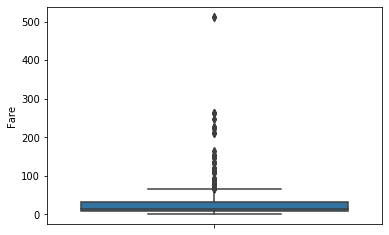

In [83]:
# Aykırı Değerler ile Birlikte Fare Değişkenini Görselleştirelim

sns.boxplot(y = train_df_num["Fare"])

In [84]:
Fare_Q1 = train_df["Fare"].quantile(0.25)
Fare_Q3 = train_df["Fare"].quantile(0.75)
Fare_IQR = Fare_Q3 - Fare_Q1

In [85]:
print("Fare_Q1:", Fare_Q1,"\t","Fare_Q3:", Fare_Q3, "\t","Fare_IQR:", Fare_IQR)

Fare_Q1: 7.9104 	 Fare_Q3: 31.0 	 Fare_IQR: 23.0896


In [86]:
lower_bound_fare = Fare_Q1 - 1 * Fare_IQR
upper_bound_fare = Fare_Q3 + 1* Fare_IQR

without_outlier_df_fare = train_df_Fare[~((train_df_Fare < (lower_bound_fare)) | (train_df_Fare> (upper_bound_fare))).any(axis = 1)]

In [87]:
print(train_df_num["Fare"].shape)  #   fare değişkeninde aykırı değerler atılmadan önce
print(without_outlier_df_fare.shape) #  yaş değişkeninde aykırı değerler atıldıktan sonra

(891,)
(750, 1)


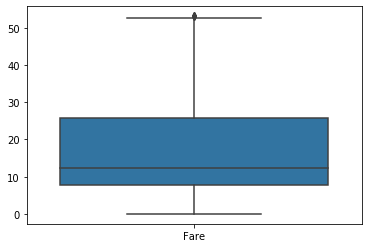

In [88]:
sns.boxplot(data = without_outlier_df_fare ) 


## 2. BASKILAMA YÖNTEMİ İLE AYKIRI DEĞERLERİ DOLDURMA

In [89]:
train_df_printing_method = train_df_num.copy()

In [90]:
AgeQ1 = train_df["Age"] .quantile(0.25)
AgeQ3 = train_df["Age"].quantile(0.75)
AgeIQR = AgeQ3 - AgeQ1


Fare_Q1 = train_df_Fare["Fare"].quantile(0.25)
Fare_Q3 = train_df_Fare["Fare"].quantile(0.75)
Fare_IQR = Fare_Q3 - Fare_Q1

lower_bound_age = AgeQ1 - 1.5 * AgeIQR
upper_bound_age = AgeQ3 + 1.5 * AgeIQR

lower_bound_fare = Fare_Q1 - 1.5 * Fare_IQR
upper_bound_fare = Fare_Q3 + 1.5 * Fare_IQR


In [91]:
low_outlier_df_age = train_df_Age < lower_bound_age
high_outlier_df_age = train_df_Age > upper_bound_age

train_df_printing_method[low_outlier_df_age ] =  lower_bound_age
train_df_printing_method[high_outlier_df_age  ] =  upper_bound_age

In [92]:
low_outlier_df_fare = train_df_Fare < lower_bound_fare  # True veya False olarak değer döndürür
high_outlier_df_fare = train_df_Fare > upper_bound_fare # True veya False olarak değer döndürür

train_df_printing_method[low_outlier_df_fare] =  lower_bound_fare
train_df_printing_method[high_outlier_df_fare] =  upper_bound_fare

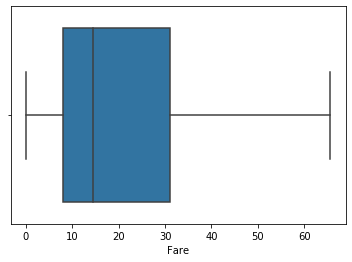

In [93]:
sns.boxplot(x = train_df_printing_method["Fare"] ) 

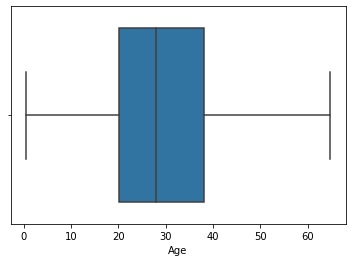

In [94]:
sns.boxplot(x = train_df_printing_method["Age"] ) 

## 3. LOCAL OUTLIER FACTOR (LOF) YÖNTEMİ İLE AYKIRI DEĞER ANALİZİ

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlayan bir yöntemdir.

In [95]:
from sklearn.neighbors import LocalOutlierFactor

In [96]:
train_df_lof = train_df.copy()

In [97]:
train_df_lof.dropna(inplace = True)

In [98]:
train_df.shape

(891, 4)

In [99]:
train_df_lof.shape

(714, 4)

In [100]:
clf = LocalOutlierFactor(n_neighbors=5, contamination = 0.1 ) # Buradaki contamination değeri yoğunluğu ifade etmektedir.

In [101]:
clf.fit_predict(train_df_lof)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1

In [102]:
df_scores = clf.negative_outlier_factor_

In [103]:
df_scores[0:10]  # gözlemlerin yoğunluk skoru

array([-8.50220478, -1.15077246, -0.99842549, -0.9498919 , -0.95788633,
       -1.18025531, -0.94633733, -1.43255278, -1.24619935, -0.97995713])

In [104]:
np.sort(df_scores)[0:30]

array([-9.74442583, -9.74375607, -9.74375607, -8.50220478, -8.26972604,
       -7.14713761, -5.48535379, -4.65813462, -4.00954468, -3.67645063,
       -3.62486909, -3.45635313, -3.42554105, -3.25100432, -3.15907858,
       -3.06652918, -3.0201967 , -2.83052015, -2.78757349, -2.78623947,
       -2.73314803, -2.68778881, -2.56316176, -2.54674445, -2.53180556,
       -2.50848131, -2.46959191, -2.43916385, -2.39735859, -2.33160418])

In [105]:
# keskin düşüşün 7.değer olduğu göz önüne alınarak eşik değer belirlenir.

np.sort(df_scores)[6]

-5.4853537914012716

In [106]:
esik_deger = np.sort(df_scores)[3]

In [107]:
aykiri_tf = df_scores > esik_deger
aykiri_tf[0:10]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [108]:
train_df_lof[df_scores > esik_deger]

,Age,SibSp,Parch,Fare
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
6,54.0,0,0,51.8625
...,...,...,...,...
885,39.0,0,5,29.1250
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
889,26.0,0,0,30.0000


In [109]:
train_df_lof # aykırı olmayan gözlemler ( eşik değerinin üzerindeki değerler)

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
885,39.0,0,5,29.1250
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
889,26.0,0,0,30.0000


In [110]:
train_df_lof[df_scores < esik_deger]  # aykırı gözlemler (eşik değerinin altındaki gözlemler)

,Age,SibSp,Parch,Fare
258,35.0,0,0,512.3292
679,36.0,0,1,512.3292
737,35.0,0,0,512.3292


# LOF YÖNTEMİNİ KULLANARAK FARKLI SINIF SAYISI PARAMETRESİNE GÖRE GÖRSELLEŞTİRME

In [111]:
def LOF(k):

    clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
    y_pred = clf.fit_predict(train_df_lof)
    LOF_Scores = clf.negative_outlier_factor_
 
    plt.title("Local Outlier Factor (LOF), K={}".format(k))
    plt.scatter(train_df.iloc[:,train_df.columns.get_loc("Age")], target, color="k", s=3., label="Data points")
    radius =(LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
    plt.scatter(train_df.iloc[:,train_df.columns.get_loc("Age")], target, s=1000 * radius, edgecolors="r",
    facecolors="none", label="Outlier scores")
    plt.axis("tight")
    plt.xlabel("{}".format(train_df.columns[train_df.columns.get_loc("Age")]))
    legend = plt.legend(loc="center")
    legend.legendHandles[0]._sizes = [50]
    legend.legendHandles[1]._sizes = [50]
    plt.show()

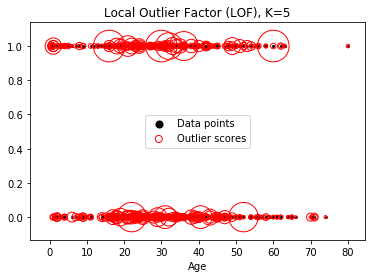

In [112]:
LOF(5) # Age Değişkenini göz önüne aldığımızda hayatta kalma ve kalmama durumu için lof yöntemi ile görselleştirme

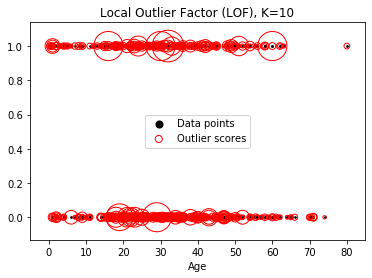

In [113]:
LOF(10) 

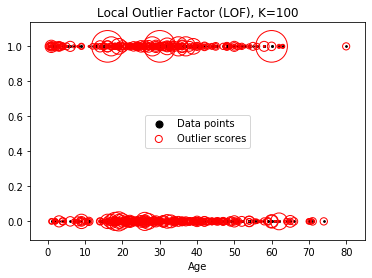

In [114]:
LOF(100)

# 4. Tahmine Dayalı Değer Atama KNN-İmputer 

In [115]:
from sklearn.impute import KNNImputer

In [116]:
train_df_knn_imp = train_df_num.copy()

In [117]:
var_names = list(train_df_num)

In [118]:
train_df_knn_imp.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [119]:
np_df = np.array(train_df_knn_imp)
np_df

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [    nan,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [120]:
imputer = KNNImputer(n_neighbors= 5)

In [121]:
filled_knn_np = imputer.fit_transform(train_df_knn_imp)

In [122]:
filled_knn_np[0:3]

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ]])

In [123]:
filled_knn_df = pd.DataFrame(filled_knn_np, columns = var_names)
filled_knn_df.isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64

In [124]:
filled_knn_df .head(10)

,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.2500
1,38.0,1.0,0.0,71.2833
2,26.0,0.0,0.0,7.9250
3,35.0,1.0,0.0,53.1000
4,35.0,0.0,0.0,8.0500
5,24.8,0.0,0.0,8.4583
6,54.0,0.0,0.0,51.8625
7,2.0,3.0,1.0,21.0750
8,27.0,0.0,2.0,11.1333
9,14.0,1.0,0.0,30.0708
